# MNIST

## Import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

## Dataload and Processing

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


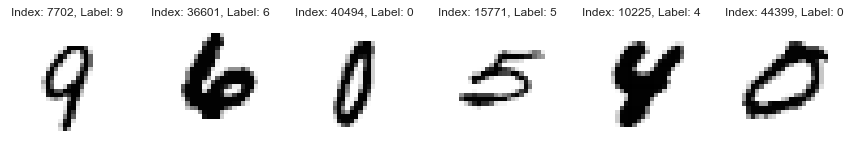

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

In [4]:
print(y_train[0])

4


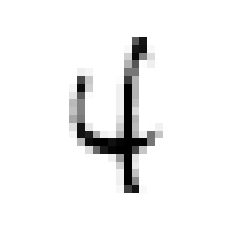

In [6]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

<img src="./imgs/ex.png" width="600" height="500"/>

In [7]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Model

In [8]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


2023-07-25 13:37:55.342435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


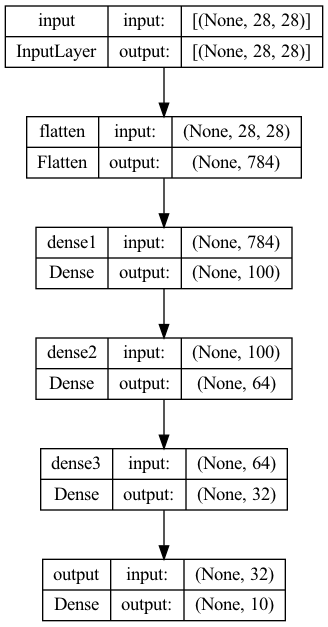

In [10]:
utils.plot_model(model, show_shapes=True)

## Train

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 2.0319 - accuracy: 0.3785 - val_loss: 1.4623 - val_accuracy: 0.6826
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.8945 - accuracy: 0.7930 - val_loss: 0.5926 - val_accuracy: 0.8411
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4986 - accuracy: 0.8625 - val_loss: 0.4449 - val_accuracy: 0.8713
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.4033 - accuracy: 0.8833 - val_loss: 0.3877 - val_accuracy: 0.8817
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3559 - accuracy: 0.8977 - val_loss: 0.3490 - val_accuracy: 0.8967
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.9062 - val_loss: 0.3208 - val_accuracy: 0.9035
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.9131 - val_loss: 0.2936 - val_accuracy: 0.9122
Epoch 

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

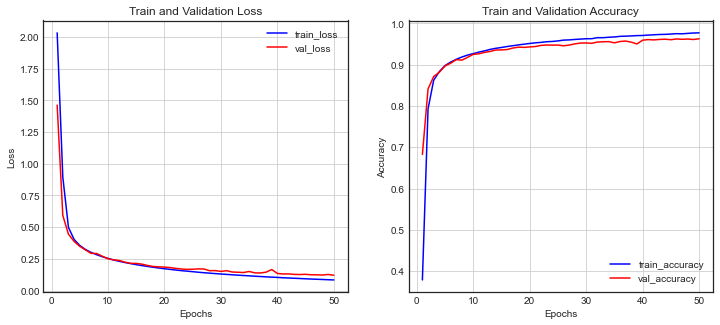

In [14]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## Test

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1165 - accuracy: 0.9651


[0.11654265224933624, 0.9650999903678894]

In [16]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

313/313 [==============================] - 1s 1ms/step
(10000, 10)
[8.9363230e-06 5.0932204e-06 1.6744561e-04 1.9848680e-03 4.1666834e-09
 1.9139219e-04 1.2069937e-10 9.9749774e-01 7.6932774e-06 1.3691535e-04]


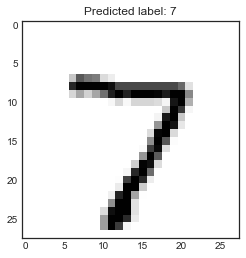

In [17]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

## Metric

In [18]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.96      0.97      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000



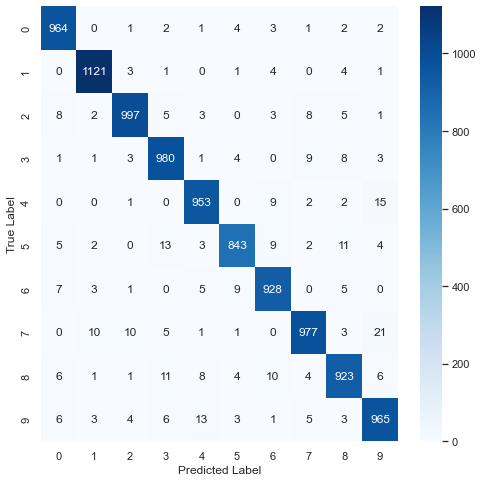

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save & Load

- 모델을 열심히 학습시키고 저장을 안한다면 다시 처음부터 학습을 해야함
- 어느 정도 학습이 되었다면 추후에 모델을 사용하기 위해서 저장할 필요가 있음
- 모델을 저장할 때는 save() 함수를 사용하여 쉽게 저장
- 다시 모델을 불러올 때는 load_model() 함수를 사용
- 모델을 저장하고 로드하는 것에서 중요한 점은 모델 생성 시에 Sequencial API 또는 Functional API를 사용한 경우에는 모델의 저장 및 로드가 가능하지만 Subclassing API 방식은 사용할 수가 없음
- Subclassing API 방식은 save_weights()와 load_weights()를 이용해 모델의 파라미터만 저장 및 로드하는 것이 가능

In [20]:
model.save('mnist_model.h5')

In [21]:
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [22]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

313/313 [==============================] - 1s 1ms/step
(10000, 10)
[8.9363230e-06 5.0932204e-06 1.6744561e-04 1.9848680e-03 4.1666834e-09
 1.9139219e-04 1.2069937e-10 9.9749774e-01 7.6932774e-06 1.3691535e-04]


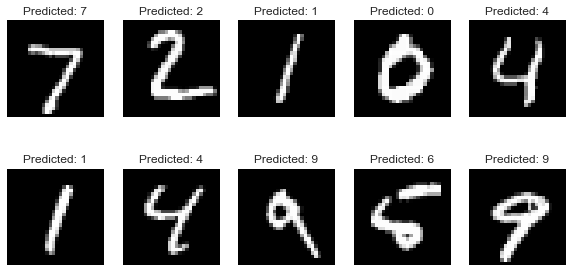

In [23]:
# 예측값 시각화하기
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

# Matplotlib를 이용해서 시각화하기
plt.figure(figsize=(10, 5))

# 처음 10개 이미지와 예측된 레이블 출력
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {arg_pred_y2[i]}")
    plt.axis('off')

plt.show()

In [24]:
## to_json() 함수를 이용해 모델을 저장해서 불러오기

# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

313/313 [==============================] - 0s 1ms/step
(10000, 10)
[0.06391012 0.09492587 0.1198925  0.14349517 0.0919539  0.09579137
 0.09640715 0.11170074 0.08693685 0.09498642]


# callBack

- 모델을 fit() 함수를 통해 학습시키는 동안 'callbacks' 매개변수를 사용하여 학습 시작이나 끝에 호출할 객체 리스트를 여러개 지정 가능

In [25]:
from tensorflow.keras import callbacks

## ModelCheckpoint

- tf.keras.callbacks.ModelCheckpoint : 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

In [26]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0920 - accuracy: 0.9736
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0852 - accuracy: 0.9753
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0799 - accuracy: 0.9768
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9787
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0692 - accuracy: 0.9802
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0652 - accuracy: 0.9812
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0606 - accuracy: 0.9829
Epoch 8/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0562 - accuracy: 0.9848
Epoch 9/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0524 - accuracy: 0.9854
Epoch 10/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.049

In [27]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
# 최상의 모델만을 저장하는 옵션으로 save_best_only=True를 지정
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0457 - accuracy: 0.9873 - val_loss: 0.1121 - val_accuracy: 0.9679
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0430 - accuracy: 0.9880 - val_loss: 0.1184 - val_accuracy: 0.9664
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0392 - accuracy: 0.9899 - val_loss: 0.1128 - val_accuracy: 0.9672
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0369 - accuracy: 0.9901 - val_loss: 0.1082 - val_accuracy: 0.9691
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.9915 - val_loss: 0.1107 - val_accuracy: 0.9686
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0319 - accuracy: 0.9916 - val_loss: 0.1054 - val_accuracy: 0.9699
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0299 - accuracy: 0.9927 - val_loss: 0.1064 - val_accuracy:

## EarlyStopping

- tf.keras.callbacks.EarlyStopping : 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용
- patience 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈추게 됨
- 모델이 향상되지 않으면 학습이 자동으로 중지되므로, epochs 숫자를 크게 해도 무방
- 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요가 없음

In [28]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
# tf.keras.callbacks.EarlyStopping: 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0225 - accuracy: 0.9950 - val_loss: 0.1130 - val_accuracy: 0.9697
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0211 - accuracy: 0.9951 - val_loss: 0.1078 - val_accuracy: 0.9706
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0190 - accuracy: 0.9960 - val_loss: 0.1121 - val_accuracy: 0.9703
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0178 - accuracy: 0.9958 - val_loss: 0.1117 - val_accuracy: 0.9694
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0165 - accuracy: 0.9966 - val_loss: 0.1149 - val_accuracy: 0.9702


## LearningRateScheduler

- tf.keras.callbacks.LearningRateSchduler : 최적화를 하는 동안 학습률을 동적으로 변경할 때 사용

In [29]:
def scheduler(epoch, learning_rate):
  # 에폭 수가 10 미만일 경우는 학습률을 그대로 하고, 10 이상이 되면 -0.1%씩 감소
  if epoch < 10:
    return learning_rate
  else:
    return learning_rate * tf.math.exp(-0.1)

In [30]:
round(model.optimizer.lr.numpy(), 5)

0.01

In [31]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

## Tensorboard

- tf.keras.callbacks.TensorBoard : 모델의 경과를 모니터링할 때 사용
- TensorBoard를 이용하여 학습과정을 모니터링하기 위해서는 logs 폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성
- TensorBoard에는 효율적인 모니터링을 위해서 여러가지 기능들을 제공

In [32]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 0.9994 - val_loss: 0.1209 - val_accuracy: 0.9715
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.1197 - val_accuracy: 0.9719
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0056 - accuracy: 0.9995 - val_loss: 0.1195 - val_accuracy: 0.9716
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0053 - accuracy: 0.9995 - val_loss: 0.1212 - val_accuracy: 0.9714
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0052 - accuracy: 0.9997 - val_loss: 0.1205 - val_accuracy: 0.9715
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 0.1236 - val_accuracy: 0.9713
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0048 - accuracy: 0.9997 - val_loss: 0.1222 - val_accuracy:

In [33]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Traceback (most recent call last):
  File "/Users/sanghyun/miniforge3/envs/yeardream/bin/tensorboard", line 10, in <module>
    sys.exit(run_main())
  File "/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/absl/app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/tensorboard/program.py", line 276, in main
  